# Exercise3: Sensors and Sensor Data

With this exercise, you will understand how to process LIDAR sensor data.

## Start robot simulation and visualization tools

### Open a desktop environment

For diplaying the visualization and the Gazebo simulation window.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import utils
import rclpy

rclpy.init(args=None)

# utils.display_desktop()

### Launch Simulation

Copy the following command and run it in a terminal.

```bash
ros2 launch iai_office_sim turtlebot3.launch.py gz_gui:=true
```

<button data-commandlinker-command="terminal:create-new" class="jupyter-button">Open a Terminal</button>

You will see the two programmes (gazebo and Rivz) popup in the virtual desktop.

### Robot control

The following code will display a GUI tool to control the robot.

You can move the robot around to explore the environment.

In [2]:
velocity_publisher = utils.VelocityPublisher()
utils.robot_steering(velocity_publisher)

#### Robot Steering:

Box(children=(FloatSlider(value=0.0, description='Moving', max=0.5, min=-0.5, orientation='vertical', step=0.0…

## Task1: Parse Sensor data


Descriptions: Laser scan

In [6]:
# fetch sensor data from callback function
from sensor_msgs.msg import LaserScan

scan_data = {}

def scan_callback(msg):
    global scan_data
    scan_data = msg
    raise KeyboardInterrupt

laserscan_subscriber = utils.LaserScanSubscriber(callback=scan_callback)

try:
    rclpy.spin(laserscan_subscriber)
except KeyboardInterrupt:
    rclpy.logging.get_logger("Quitting `rclpy.spin(laserscan_subscriber)`").info('Done')

laserscan_subscriber.subscription.destroy()
laserscan_subscriber.destroy_node()

scan_data

[INFO] [1726138780.816186998] [Quitting `rclpy.spin(laserscan_subscriber)`]: Done


sensor_msgs.msg.LaserScan(header=std_msgs.msg.Header(stamp=builtin_interfaces.msg.Time(sec=1355, nanosec=995000000), frame_id='base_scan'), angle_min=0.0, angle_max=6.28000020980835, angle_increment=0.01749303564429283, time_increment=0.0, scan_time=0.0, range_min=0.11999999731779099, range_max=3.5, ranges=[inf, inf, inf, inf, 3.4869463443756104, 3.2396440505981445, 2.995903968811035, 2.8341519832611084, 2.667168140411377, 2.517766237258911, 2.3994288444519043, 2.2709708213806152, 2.1732358932495117, 2.074907064437866, 1.9865041971206665, 1.9108468294143677, 1.8187910318374634, 1.7421488761901855, 1.698423147201538, 1.6438965797424316, 1.587168574333191, 1.545907735824585, 1.4929931163787842, 1.4559024572372437, 1.4429638385772705, 1.4579343795776367, 1.4902859926223755, 1.4807682037353516, 1.5165040493011475, 1.5263066291809082, 1.937857985496521, 1.9530938863754272, 1.9988033771514893, 2.009504556655884, 2.07031512260437, 2.090028762817383, 2.132605791091919, 2.1696674823760986, 2.18

### Visualize sensor data

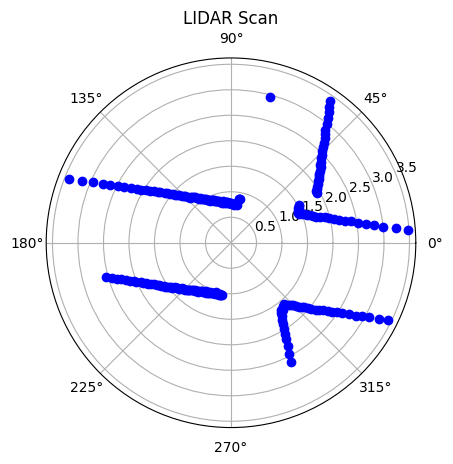

In [7]:
import numpy as np
import matplotlib.pyplot as plt

angles = np.arange(scan_data.angle_min, scan_data.angle_max, scan_data.angle_increment)
distances = np.array(scan_data.ranges)
plt.polar(angles, distances, 'bo')
plt.title('LIDAR Scan')
plt.show()

## Task2: Draw a map with the laser scan


Descriptions: SLAM

1. Run the following map scaning command.

```bash
ros2 launch slam_toolbox online_async_launch.py use_sim_time:=True
```
<button data-commandlinker-command="terminal:create-new" class="jupyter-button">Open a Terminal</button>

2. Enable Map in rviz

### Todos:
- [ ] SLAM
- [ ] Naviation
- [ ] ...